In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("utkface_brisque.csv", header=None, names=["filename", "score"])

In [3]:
df.describe()

,score
count,18978.000000
mean,38.874163
std,16.060158
min,-33.125305
25%,28.625671
50%,42.020447
75%,51.111267
max,160.250671


In [4]:
df.loc[df['score'].idxmax()]

filename    7_1_0_20170110184045236.png
score                        160.250671
Name: 18625, dtype: object

<Axes: xlabel='None', ylabel='score'>

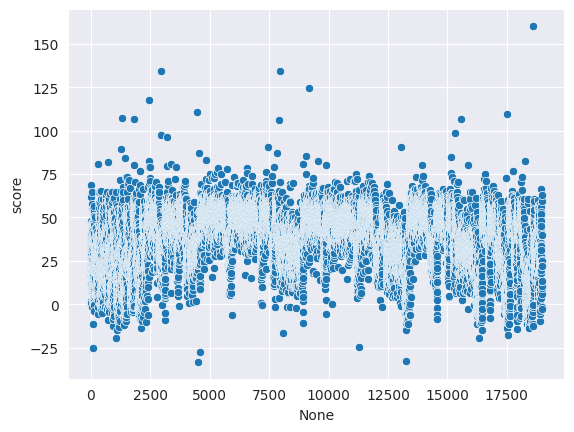

In [5]:
sns.scatterplot(x=df.index, y=df['score'])

In [6]:
value = np.percentile(df['score'], 95)
value

59.01368408203124

In [7]:
ucb_acc_df = pd.read_csv("ucb_accurate.csv", header=None, names=["filename", "score"])

In [8]:
ucb_acc_df.describe()

,score
count,98.000000
mean,32.843719
std,13.778750
min,-12.525696
25%,24.662659
50%,32.664978
75%,41.587341
max,67.896667


In [9]:
ucb_mod_df = pd.read_csv("ucb_moderate.csv", header=None, names=["filename", "score"])

In [10]:
ucb_mod_df.describe()

,score
count,90.000000
mean,31.374040
std,13.732424
min,-0.988098
25%,23.832947
50%,30.986267
75%,38.544006
max,96.048645


In [11]:
ucb_imprecise_df = pd.read_csv("ucb_imprecise.csv", header=None, names=["filename", "score"])

In [12]:
ucb_imprecise_df.describe()

,score
count,83.000000
mean,29.654433
std,13.486193
min,-3.420715
25%,19.984314
50%,30.770203
75%,40.008972
max,59.822937


<Axes: xlabel='None', ylabel='score'>

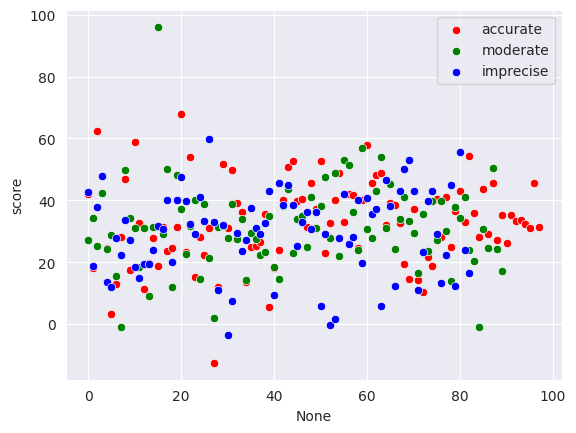

In [13]:
# Create a list of dataframes
dataframes = [ucb_acc_df, ucb_mod_df, ucb_imprecise_df]

# Create a list of colors for the dataframes
colors = ['red', 'green', 'blue']

# Create the scatterplot
sns.scatterplot(x=ucb_acc_df.index, y='score', data=ucb_acc_df, color=colors[0], label='accurate')
sns.scatterplot(x=ucb_mod_df.index, y='score', data=ucb_mod_df, color=colors[1], label='moderate')
sns.scatterplot(x=ucb_imprecise_df.index, y='score', data=ucb_imprecise_df, color=colors[2], label='imprecise')

In [14]:
combined_df = pd.concat([ucb_acc_df, ucb_mod_df, ucb_imprecise_df])
combined_df

,filename,score
0,0_0_1_20231111200646265384.png,42.036316
1,0_0_1_20231111200709733806.png,18.112488
2,0_0_1_20231111200737758999.png,62.312683
3,0_0_1_20231111200827493751.png,47.880554
4,0_0_1_20231111200949641359.png,24.765808
...,...,...
78,7_1_1_20231113153127607663.png,44.859558
79,7_1_1_20231113153154126106.png,12.228699
80,7_1_1_20231113153218257091.png,55.552429
81,7_1_1_20231113153247723432.png,23.832214


In [22]:
value = 47.6
combined_df['accepted'] = combined_df['score'] <= value
combined_df

,filename,score,accepted
0,0_0_1_20231111200646265384.png,42.036316,True
1,0_0_1_20231111200709733806.png,18.112488,True
2,0_0_1_20231111200737758999.png,62.312683,False
3,0_0_1_20231111200827493751.png,47.880554,False
4,0_0_1_20231111200949641359.png,24.765808,True
...,...,...,...
78,7_1_1_20231113153127607663.png,44.859558,True
79,7_1_1_20231113153154126106.png,12.228699,True
80,7_1_1_20231113153218257091.png,55.552429,False
81,7_1_1_20231113153247723432.png,23.832214,True


In [23]:
combined_df.to_csv("combined_brisque_results.csv", index=False)